# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


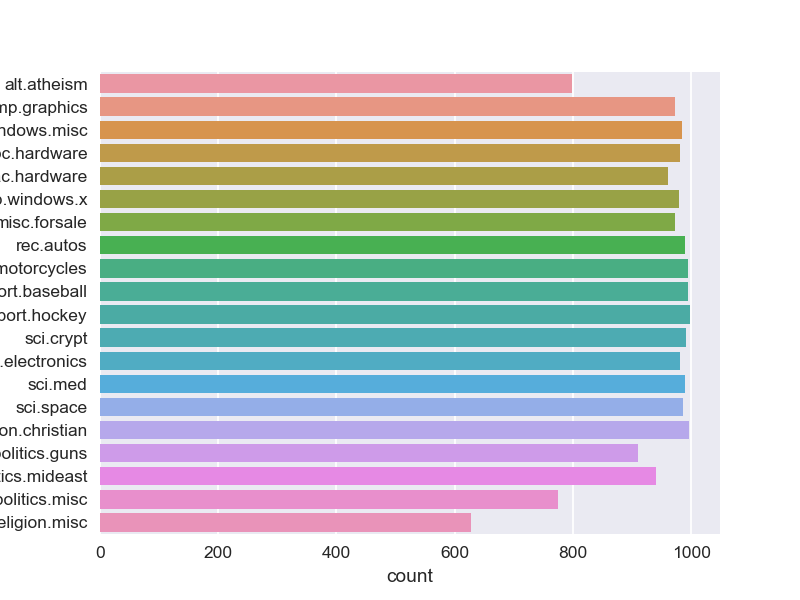

In [0]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [0]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [0]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [0]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [0]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [0]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


In [1]:
import os
import re
import nltk
# nltk.download('all')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

In [2]:
names = os.listdir("./documents/")

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [3]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
     #STEP1
    #preprocessing email
   
    email_list = []
    emails = re.findall("[\w\.]+@[\w\.]+" , Input_Text) # finding all the valid emails
    #print(emails)
    for email in emails:
        org = email.split("@")[1].split('.')
        #print(org)
        for i in org:
            if i!='com' and len(i)>2:
                email_list.append(i)
    preprocess_email=' '.join(email_list)
    #print(preprocess_email)
    
    
    #STEP2
    #text = []
    text = re.sub("[\w\.]+@[\w\.]+", " ", Input_Text)
    
    #STEP3
    #preprocess_subject
    subject = re.findall("Subject:.*", Input_Text) # finding  subject line
    pat1 = r"Subject:" #subject part
    pat2 = r"[^A-Za-z0-9\s]*" #special characters part
    combined_pat = r'|'.join((pat1, pat2))
    subject = re.sub(combined_pat,"",subject[0])
    
    
    #STEP4
    text = re.sub('Subject:.*',' ',text)
    
    #STEP5
    pat1 = r"Write to:.*" 
    pat2 = r"From:.*" 
    combined_pat = r'|'.join((pat1, pat2))
    text = re.sub(combined_pat,"",text)
  
    
    #STEP6
    text = re.sub(r"<.*>","",text)
    #STEP7
    text = re.sub(r"\(.*\)", "", text) 
    #print(text)
    
     #STEP8
    text = re.sub(r"[\n\t\\-]*", "", text)#https://stackoverflow.com/questions/10711116/strip-spaces-tabs-newlines-python
    #print(text)
    #STEP9
    text = re.sub("\w+:"," ",text) #step9
    #STEP10
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'ll", " will", text)
    
    #STEP11
    #https://stackoverflow.com/questions/48660547/how-can-i-extract-gpelocation-using-nltk-ne-chunk
    chunked = ne_chunk(pos_tag(word_tokenize(text))) 
    current_chunk = []
    replace_chunk = []
    for subtree in chunked:
        if type(subtree) == Tree and subtree.label() == 'GPE':
            #create list of actual chunks in teh doc
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
            #create list of replacement chunks (_) in teh doc
            replace_chunk.append("_".join([token for token, pos in subtree.leaves()]))
#             print("____________________________")
#             print(current_chunk)
#             print("____________________________")
            for i in range(len(replace_chunk)):
                text = text.replace(current_chunk[i], replace_chunk[i])
#                 print(current_chunk[i])
#                 print(replace_chunk[i])
        if type(subtree) == Tree and subtree.label() == 'PERSON':
            for token, pos in subtree.leaves():
#                 print(1)
#                 print(token)
                text = text.replace(token,"") 
    #print(text)
    #STEP12
    text = re.sub('[0-9]',' ',text) 
    
     #STEP13
    #https://stackoverflow.com/questions/55011380/regex-to-match-words-both-starting-and-ending-with-underscore-with-python-3/55011613
    #https://stackoverflow.com/questions/51888893/regex-to-replace-words-separated-by-underscore-in-python
    text = re.sub(r"\b_([a-zA-z\d]+)_\b",r"\1",text) 
    text = re.sub(r"\b_([a-zA-z\d]+)\b",r"\1",text) 
    text = re.sub(r"\b([a-zA-z\d]+)_\b",r"\1",text) 
    
    text = re.sub(r"\b[a-zA-z\d]_([a-zA-z\d]+)",r"\1",text)
    text = re.sub(r"\b[a-zA-z\d][a-zA-z\d]_([a-zA-z\d]+)",r"\1",text)
    
    text = text.lower()
    text = re.sub(r"[^a-zA-Z_]"," ",text) # ^ negation 
    text = ' '.join([word for word in text.split() if len(word)>3 and len(word)<15])
    return (preprocess_email,subject,text)

In [129]:
#re.sub(r"\b_(\w)_\b",r"\1","_hello_") 

'_hello_'

In [130]:
# re.sub(r"\b[a-zA-z\d][a-zA-z\d]_([a-zA-z\d]+)",r"\1","d__berlin dr_berlin , dr_dre")

'berlin berlin , dre'

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

In [209]:
check = []
with open("./documents/alt.atheism_49960.txt",'r',encoding='ISO-8859-1') as f:  
        check.append(f.read())

In [210]:
preprocess(check[0])

('mantis netcom mantis',
 ' AltAtheism FAQ Atheist Resources',
 'atheism december atheist resources addresses atheist organizations usafreedom from religion foundation fish bumper stickers assorted other atheist paraphernalia areavailable from freedom from religion foundation evolution signsevolution designs sell fish fish symbol like oness stick their cars with feet word writteninside deluxe moulded plastic fish postpaid people francisco area from mailing people directly theprice fish american atheist pressaap publish various atheist books critiques bible lists ofbiblical contradictions such book bible handbook american atheist isbn edition bible contradictions absurdities atrocities immoralities contains itself based king version bible austin prometheus bookssell books including holy horrors alternate address prometheus humanisman organization promoting black secular humanism uncovering history ofblack freethought they publish quarterly newsletter examiner association national secula

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [167]:
text_files = []
d=r"./documents"
for i in os.listdir(r"./documents"):
    with open("./documents/"+i,'r',encoding='ISO-8859-1') as f:  
        text_files.append(f.read())

In [205]:
from tqdm import tqdm
processed_text = []
processed_subject = []
processed_emails = []
for doc in tqdm(range(len(text_files))):
    email,subject,text = preprocess(text_files[doc])
    processed_text.append(text)
    processed_subject.append(subject)
    processed_emails.append(email)

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [47:26<00:00,  6.61it/s]


In [184]:
class_label = []
for i in names:
      class_label.append(i.split('_')[0])

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(class_label,processed_text,processed_subject,processed_emails)),columns=[ 'class', 'preprocessed_text', 'preprocessed_subject','preprocessed_emails'])

In [208]:
df.to_csv('preprocessed_data.csv')

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [5]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import zeros
from tensorflow.keras.layers import Conv1D,MaxPool1D,concatenate,Embedding
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
df = pd.read_csv('./preprocessed_data.csv')
df['combined_text'] = df['preprocessed_text']+' '+df['preprocessed_subject']+' '+df['preprocessed_emails']
df.head()

,Unnamed: 0,class,preprocessed_text,preprocessed_subject,preprocessed_emails,combined_text
0,0,alt.atheism,atheism december atheist resources addresses a...,AltAtheism FAQ Atheist Resources,mantis netcom mantis,atheism december atheist resources addresses a...
1,1,alt.atheism,atheism pril egin signed messge introduction m...,AltAtheism FAQ Introduction to Atheism,mantis mantis mantis,atheism pril egin signed messge introduction m...
2,2,alt.atheism,article well quite different necessarily more ...,Re Gospel Dating,dbstu1 mimsy umd edu umd edu,article well quite different necessarily more ...
3,3,alt.atheism,recently have been ordered none have resisted ...,Re university violating separation of churchs...,mantis kepler unh edu,recently have been ordered none have resisted ...
4,4,alt.atheism,article however hate economic terrorism politi...,Re socmotss et al Princeton axes matching fun...,Watson Ibm Com harder ccr harder ccr watson ibm,article however hate economic terrorism politi...


In [7]:
RANDOM_SEED = 42
df['class'] = df['class'].astype("str")
X,y = df[['combined_text']], df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=RANDOM_SEED,stratify=y)

In [4]:
#https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
embeddings_dict = {}
with open("glove.6B.200d.txt", 'r',encoding="utf8") as f: 

    for line in f:
        values = line.split()
        word = values[0]
        vector  = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector




In [5]:
list(X_train['combined_text'])

['article article from according numerous accounts those compound fire started armoured vehicle crushing large propane tank turning over numerous lanterns then smoke flames start from three different places particular three different places where there were just where evidence this sayso texas refuted their lies today government start fire then weren people trying compound building pump knock walls down aroundyou fast find exit besides know even bothering know either willing swallow everything good find tremendously chilling that many people seem willing accept governments story despite much evidence contrary find tremendously chilling that many people seem eager believe murderous heavilyarmed religious cult despite much evidence contrary this exact same thing happened under bush administration what would your answer then would still prefer believe cultists apologist didn then again that elected people believe that campaign promisses would respected once into office that politicians el

In [10]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#filters : a string where each element is a character that will be filtered from the texts. 
#The default is all punctuation, plus tabs and line breaks, minus the ' character.
X_train['combined_text'] = X_train['combined_text'].astype("str")
X_test['combined_text'] = X_test['combined_text'].astype("str")
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenized_text = tokenizer.fit_on_texts(list(X_train['combined_text']))
vocab_size =len(tokenizer.word_index)+1
encoded_docs_train  = tokenizer.texts_to_sequences(list(X_train['combined_text']))

# pad documents to a avg length of the document in the entire corpus
mean_length = round(df['combined_text'] .str.split().str.len().mean())
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=mean_length, padding='post')


encoded_docs_test = tokenizer.texts_to_sequences(list(X_test['combined_text']))
padded_docs_test = pad_sequences(encoded_docs_test,maxlen=mean_length)

print(padded_docs_test.shape)
embedding_matrix = zeros((vocab_size, 200))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

<ipython-input-10-560b5f26a294>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['combined_text'] = X_train['combined_text'].astype("str")
<ipython-input-10-560b5f26a294>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['combined_text'] = X_test['combined_text'].astype("str")


(4707, 137)


NameError: name 'embeddings_dict' is not defined

In [30]:
#round(df['combined_text'] .str.split().str.len().mean())

137

In [25]:
mean_length

137

In [6]:
#Model Architecture
tf.keras.backend.clear_session()
import tensorflow_addons as tfa
input_layer = Input(shape=(mean_length,))
e = Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False,input_length=mean_length)(input_layer)

layer1 = Conv1D(filters=14,kernel_size=2,activation='relu')(e)
layer2 = Conv1D(filters=14,kernel_size=2,activation='relu')(e)
layer3 = Conv1D(filters=14,kernel_size=2,activation='relu')(e)

concat1 = concatenate([layer1,layer2,layer3])

maxpool1 = MaxPool1D(pool_size=2,strides=2)(concat1)

layer4 = Conv1D(filters=14,kernel_size=2,activation='relu')(maxpool1)
layer5 = Conv1D(filters=14,kernel_size=2,activation='relu')(maxpool1)
layer6 = Conv1D(filters=14,kernel_size=2,activation='relu')(maxpool1)

concat2 = concatenate([layer4,layer5,layer6])

dropout = Dropout(rate=0.2)(concat2)
maxpool2 = MaxPool1D(pool_size=2,strides=2)(dropout) 
layer7 = Conv1D(filters=14,kernel_size=2,activation='relu')(maxpool2)
flatten = Flatten()(layer7)
dropout = Dropout(rate=0.2)(flatten)
dense = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal)(dropout)
output_layer = Dense(20,activation='softmax',kernel_initializer=tf.keras.initializers.he_normal)(dense)

Early_stop = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,verbose=1)

log_dir = "model1_logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d%H%M")
tensorboard = TensorBoard(log_dir=log_dir,histogram_freq=1)

filepath = "best_model_1.h5"
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,mode='auto',save_best_only=True)

model = Model(input_layer,output_layer)
#https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy',tfa.metrics.F1Score(num_classes=20,average='micro')])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 137)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 137, 200)     25273600    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 136, 14)      5614        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 136, 14)      5614        embedding[0][0]                  
______________________________________________________________________________________________

In [17]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1,1))
y_test = ohe.transform(np.array(y_test).reshape(-1,1))

In [15]:
model = model.fit(padded_docs_train,y_train.todense(),epochs=15,batch_size=32,validation_data=(padded_docs_test,y_test.todense()),callbacks=[Early_stop,tensorboard,checkpoint])

Epoch 1/15
442/442 [==============================] - 11s 25ms/step - loss: 1.7338 - accuracy: 0.3896 - f1_score: 0.3896 - val_loss: 1.6931 - val_accuracy: 0.4376 - val_f1_score: 0.4376

Epoch 00001: val_accuracy improved from -inf to 0.43765, saving model to best_model_1.h5
Epoch 2/15
442/442 [==============================] - 9s 21ms/step - loss: 1.3033 - accuracy: 0.5398 - f1_score: 0.5398 - val_loss: 1.5107 - val_accuracy: 0.4905 - val_f1_score: 0.4905

Epoch 00002: val_accuracy improved from 0.43765 to 0.49055, saving model to best_model_1.h5
Epoch 3/15
442/442 [==============================] - 9s 21ms/step - loss: 1.1210 - accuracy: 0.6097 - f1_score: 0.6097 - val_loss: 1.3347 - val_accuracy: 0.5760 - val_f1_score: 0.5760

Epoch 00003: val_accuracy improved from 0.49055 to 0.57595, saving model to best_model_1.h5
Epoch 4/15
442/442 [==============================] - 10s 23ms/step - loss: 0.9936 - accuracy: 0.6542 - f1_score: 0.6542 - val_loss: 1.2862 - val_accuracy: 0.5817 - val

In [22]:
import matplotlib.pyplot as plt

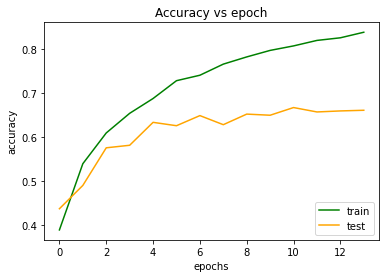

In [16]:
def accuracy_plot(history):
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs epoch')
  plt.plot(history.history['accuracy'], color='green', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.legend(loc ="lower right")
  plt.show()
accuracy_plot(model)

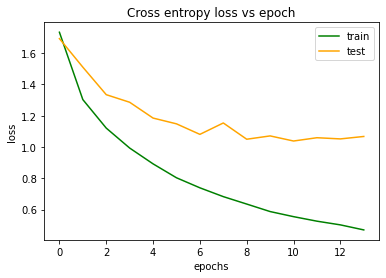

In [17]:
def loss_plot(history):
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Cross entropy loss vs epoch')
  plt.plot(history.history['loss'], color='green', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.legend(loc ="upper right")
  plt.show()
loss_plot(model)

In [3]:
%tensorboard --logdir model1_logs/fit/202109152318  --host localhost

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [11]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
tokenizer = Tokenizer(char_level=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenized_text = tokenizer.fit_on_texts(list(X_train['combined_text']))
vocab_size =len(tokenizer.word_index)+1
encoded_docs_train  = tokenizer.texts_to_sequences(list(X_train['combined_text']))

# pad documents to a avg length of the document in the entire corpus
mean_length = round(df['combined_text'] .str.split().str.len().mean())
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=mean_length, padding='post')


encoded_docs_test = tokenizer.texts_to_sequences(list(X_test['combined_text']))
padded_docs_test = pad_sequences(encoded_docs_test,maxlen=mean_length)

In [12]:
#https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
embeddings_char_dict = {}
with open("glove.840B.300d-char.txt", 'r',encoding="utf8") as f: 

    for line in f:
        values = line.split()
        word = values[0]
        vector  = np.asarray(values[1:], dtype='float32')
        embeddings_char_dict[word] = vector


In [13]:
embedding_matrix_char = zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_char_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix_char[i] = embedding_vector

In [14]:
tf.keras.backend.clear_session()
import tensorflow_addons as tfa
input_layer = Input(shape=(mean_length,))
e = Embedding(vocab_size,300,weights=[embedding_matrix_char],trainable=False,input_length=mean_length)(input_layer)

layer1 = Conv1D(filters=16,kernel_size=2,activation='relu')(e)
layer2 = Conv1D(filters=14,kernel_size=2,activation='relu')(layer1)




maxpool1 = MaxPool1D(pool_size=2,strides=2)(layer2)

layer4 = Conv1D(filters=16,kernel_size=2,activation='relu')(maxpool1)
layer5 = Conv1D(filters=14,kernel_size=2,activation='relu')(layer4)



dropout = Dropout(rate=0.2)(layer5)
maxpool2 = MaxPool1D(pool_size=2,strides=2)(dropout) 
layer7 = Conv1D(filters=14,kernel_size=2,activation='relu')(maxpool2)
flatten = Flatten()(layer7)
dropout = Dropout(rate=0.2)(flatten)
dense = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal)(dropout)
output_layer = Dense(20,activation='softmax',kernel_initializer=tf.keras.initializers.he_normal)(dense)

Early_stop = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,verbose=1)

log_dir = "model2_logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d%H%M")
tensorboard = TensorBoard(log_dir=log_dir,histogram_freq=1)

filepath = "best_model_2.h5"
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,mode='auto',save_best_only=True)

model = Model(input_layer,output_layer)
#https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy',tfa.metrics.F1Score(num_classes=20,average='micro')])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 137)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 137, 300)          12000     
_________________________________________________________________
conv1d (Conv1D)              (None, 136, 16)           9616      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 135, 14)           462       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 67, 14)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 66, 16)            464       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 65, 14)            462   

In [24]:
model = model.fit(padded_docs_train,y_train.todense(),\
                  epochs=15,batch_size=32,validation_data=(padded_docs_test,y_test.todense()),callbacks=[Early_stop,tensorboard,checkpoint])

Epoch 1/15
442/442 [==============================] - 14s 33ms/step - loss: 2.6712 - accuracy: 0.1873 - f1_score: 0.1873 - val_loss: 2.9535 - val_accuracy: 0.1033 - val_f1_score: 0.1033

Epoch 00001: val_accuracy did not improve from 0.10644
Epoch 2/15
442/442 [==============================] - 14s 32ms/step - loss: 2.6537 - accuracy: 0.1913 - f1_score: 0.1913 - val_loss: 2.9388 - val_accuracy: 0.1111 - val_f1_score: 0.1111

Epoch 00002: val_accuracy improved from 0.10644 to 0.11111, saving model to best_model_2.h5
Epoch 3/15
442/442 [==============================] - 14s 32ms/step - loss: 2.6265 - accuracy: 0.1948 - f1_score: 0.1948 - val_loss: 2.9509 - val_accuracy: 0.1115 - val_f1_score: 0.1115

Epoch 00003: val_accuracy improved from 0.11111 to 0.11154, saving model to best_model_2.h5
Epoch 4/15
442/442 [==============================] - 14s 32ms/step - loss: 2.6173 - accuracy: 0.2003 - f1_score: 0.2003 - val_loss: 2.9555 - val_accuracy: 0.1088 - val_f1_score: 0.1088

Epoch 00004: 

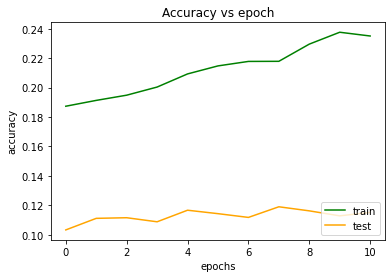

In [25]:
def accuracy_plot(history):
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs epoch')
  plt.plot(history.history['accuracy'], color='green', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.legend(loc ="lower right")
  plt.show()
accuracy_plot(model)
#loss_plot(model)

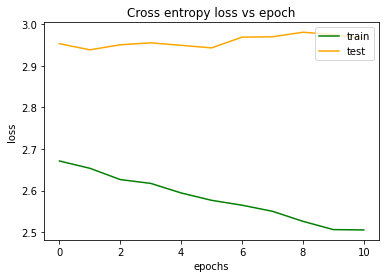

In [26]:
def loss_plot(history):
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Cross entropy loss vs epoch')
  plt.plot(history.history['loss'], color='green', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.legend(loc ="upper right")
  plt.show()
loss_plot(model)

### Observations:


Model_1 trained with glove word embedding for 15 epoch and batch size 0f 32,  was able to achieve good performance within 15 epoch's even with minimal tuning of the architecture. It was observed that val accuracy was not improving after 10th epoch. Hence early stopping was triggered.

Model_2 was trained with glove character embeddings for 15 epoch and batch size 0f 32. Maximum accuracy obtained with this training was 12%

Models can be certainly improved further by changing the no of filters, trying with different weight initialization and also adding  regularization, more no of neurons in output layers .